## 위키피디아로 Word2Vec 학습하기
### 1. 위키피디아로부터 데이터 다운로드 및 통합
위키피디아로부터 데이터를 파싱하기 위한 파이썬 패키지인 wikiextractor를 설치합니다.

```pip install wikiextractor```

위키피디아 덤프(위키피디아 데이터)를 다운로드합니다.

```!wget https://dumps.wikimedia.org/kowiki/latest/kowiki-latest-pages-articles.xml.bz2```

위키익스트랙터를 사용하여 위키피디아 덤프를 파싱합니다.

```!python -m wikiextractor.WikiExtractor kowiki-latest-pages-articles.xml.bz2```

현재 경로에 있는 디렉토리와 파일들의 리스트를 받아옵니다.

In [2]:
%cd ./data/ko_wiki
%ls

/mnt/c/PJT/000NLP/ArkChatBot/jupyter_app/nlp/data/ko_wiki
kowiki-latest-pages-articles.xml.bz2*  text/


In [3]:
import os
import re

In [4]:
os.listdir('text')


['AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI']

In [5]:
%ls text/AA

wiki_00*  wiki_13*  wiki_26*  wiki_39*  wiki_52*  wiki_65*  wiki_78*  wiki_91*
wiki_01*  wiki_14*  wiki_27*  wiki_40*  wiki_53*  wiki_66*  wiki_79*  wiki_92*
wiki_02*  wiki_15*  wiki_28*  wiki_41*  wiki_54*  wiki_67*  wiki_80*  wiki_93*
wiki_03*  wiki_16*  wiki_29*  wiki_42*  wiki_55*  wiki_68*  wiki_81*  wiki_94*
wiki_04*  wiki_17*  wiki_30*  wiki_43*  wiki_56*  wiki_69*  wiki_82*  wiki_95*
wiki_05*  wiki_18*  wiki_31*  wiki_44*  wiki_57*  wiki_70*  wiki_83*  wiki_96*
wiki_06*  wiki_19*  wiki_32*  wiki_45*  wiki_58*  wiki_71*  wiki_84*  wiki_97*
wiki_07*  wiki_20*  wiki_33*  wiki_46*  wiki_59*  wiki_72*  wiki_85*  wiki_98*
wiki_08*  wiki_21*  wiki_34*  wiki_47*  wiki_60*  wiki_73*  wiki_86*  wiki_99*
wiki_09*  wiki_22*  wiki_35*  wiki_48*  wiki_61*  wiki_74*  wiki_87*
wiki_10*  wiki_23*  wiki_36*  wiki_49*  wiki_62*  wiki_75*  wiki_88*
wiki_11*  wiki_24*  wiki_37*  wiki_50*  wiki_63*  wiki_76*  wiki_89*
wiki_12*  wiki_25*  wiki_38*  wiki_51*  wiki_64*  wiki_77*  wiki_90*


이제 이 6개 AA ~ AF 디렉토리 안의 wiki 숫자 형태의 수많은 파일들을 하나로 통합하는 과정을 진행해야 합니다. AA ~ AF 디렉토리 안의 모든 파일들의 경로를 파이썬의 리스트 형태로 저장합니다.

In [6]:
def list_wiki(dirname):
    filepaths = []
    filenames = os.listdir(dirname)
    for filename in filenames:
        filepath = os.path.join(dirname, filename)

        if os.path.isdir(filepath):
            # 재귀 함수
            filepaths.extend(list_wiki(filepath))
        else:
            find = re.findall(r"wiki_[0-9][0-9]", filepath)
            if 0 < len(find):
                filepaths.append(filepath)
    return sorted(filepaths)

In [8]:
filepaths = list_wiki('text')

총 파일의 개수를 확인해봅시다.

In [9]:
len(filepaths)

886

총 파일의 개수는 886개입니다. 이제 output_file.txt라는 파일에 886개의 파일을 전부 하나로 합칩니다.

In [10]:
with open("output_file.txt", "w") as outfile:
    for filename in filepaths:
        with open(filename) as infile:
            contents = infile.read()
            outfile.write(contents)

파일을 읽고 10줄만 출력해보겠습니다.

In [11]:
f = open('output_file.txt', encoding="utf8")

i = 0
while True:
    line = f.readline()
    if line != '\n':
        i = i+1
        print("%d번째 줄 :"%i + line)
    if i==10:
        break 
f.close()

1번째 줄 :<doc id="5" url="https://ko.wikipedia.org/wiki?curid=5" title="지미 카터">

2번째 줄 :지미 카터

3번째 줄 :제임스 얼 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39대 대통령 (1977년 ~ 1981년)이다.

4번째 줄 :생애.

5번째 줄 :어린 시절.

6번째 줄 :지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다.

7번째 줄 :조지아 공과대학교를 졸업하였다. 그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다. 1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다. 그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.

8번째 줄 :정계 입문.

9번째 줄 :1962년 조지아주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주지사 선거에 낙선하지만, 1970년 조지아 주지사를 역임했다. 대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다. 조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.

10번째 줄 :대통령 재임.



### 2. 형태소 분석

In [16]:
from tqdm import tqdm_notebook
from konlpy.tag import Mecab

형태소 분석기 Mecab을 사용하여 토큰화를 진행해보겠습니다.

In [13]:
mecab = Mecab()

우선 output_file에는 총 몇 줄이 있는지 확인합니다.

In [14]:
f = open('output_file.txt', encoding="utf8")
lines = f.read().splitlines()
print(len(lines))

10147017


10,147,017개의 줄이 존재합니다. 상위 10개만 출력해봅시다.

In [15]:
lines[:10]

['<doc id="5" url="https://ko.wikipedia.org/wiki?curid=5" title="지미 카터">',
 '지미 카터',
 '',
 '제임스 얼 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39대 대통령 (1977년 ~ 1981년)이다.',
 '생애.',
 '어린 시절.',
 '지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다.',
 '조지아 공과대학교를 졸업하였다. 그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다. 1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다. 그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.',
 '정계 입문.',
 '1962년 조지아주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주지사 선거에 낙선하지만, 1970년 조지아 주지사를 역임했다. 대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다. 조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.']

두번째 줄을 보면 아무런 단어도 들어있지 않은 ''와 같은 줄도 존재합니다. 해당 문자열은 형태소 분석에서 제외하도록 하고 형태소 분석을 수행해봅시다.

In [17]:
result = []

for line in tqdm_notebook(lines):
  # 빈 문자열이 아닌 경우에만 수행
  if line:
    result.append(mecab.morphs(line))

/tmp/ipykernel_17980/3594421757.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for line in tqdm_notebook(lines):


  0%|          | 0/10147017 [00:00<?, ?it/s]

빈 문자열은 제외하고 형태소 분석을 진행했습니다. 이제 몇 개의 줄. 즉, 몇 개의 문장이 존재하는지 확인해봅시다.

In [18]:
len(result)

6846402

6,846,402개로 문장의 수가 줄었습니다.

### 3. Word2Vec 학습
형태소 분석을 통해서 토큰화가 진행된 상태이므로 Word2Vec을 학습합니다.

In [19]:
from gensim.models import Word2Vec
model = Word2Vec(result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [20]:
model_result1 = model.wv.most_similar("대한민국")
print(model_result1)

[('한국', 0.7482331395149231), ('미국', 0.6808285117149353), ('일본', 0.6590150594711304), ('부산', 0.565693736076355), ('홍콩', 0.5645527839660645), ('이종환', 0.5511518716812134), ('오스트레일리아', 0.5466106534004211), ('태국', 0.537969172000885), ('서울', 0.5374230742454529), ('중화민국', 0.5357064604759216)]


In [21]:
model_result2 = model.wv.most_similar("어벤져스")
print(model_result2)

[('스파이더맨', 0.8057953119277954), ('엑스맨', 0.8003357648849487), ('아이언맨', 0.7798444032669067), ('어벤저스', 0.770571768283844), ('스타워즈', 0.7508123517036438), ('퍼니셔', 0.7464526295661926), ('인크레더블', 0.7459753751754761), ('트랜스포머', 0.7437029480934143), ('《》,', 0.7385751008987427), ('솔저', 0.7296960949897766)]


In [22]:
model_result3 = model.wv.most_similar("반도체")
print(model_result3)

[('집적회로', 0.7999906539916992), ('웨이퍼', 0.7655954957008362), ('연료전지', 0.7589029669761658), ('전자', 0.7503774166107178), ('트랜지스터', 0.73732590675354), ('전기차', 0.7312939167022705), ('실리콘', 0.7312069535255432), ('PCB', 0.7111230492591858), ('TSMC', 0.7083587646484375), ('가전제품', 0.6979259848594666)]


### 4. t-SNE 시각화:
t-SNE is a non-linear dimensionality reduction algorithm that attempts to represent high-dimensional data and the underlying relationships between vectors in a lower-dimensional space.
Here is a good tutorial on it: [설명](https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

To make the visualizations more relevant, we will look at the relationships between a query word (in **red**), its most similar words in the model (in **blue**), and other words from the vocabulary (in **green**).

In [24]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
#     arrays = np.empty((0, 300), dtype='f')
    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=20).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [31]:
# 한글깨지는거 해결
import matplotlib as mpl
mpl.get_configdir()
plt.rcParams["font.family"] = 'NanumGothic'

/mnt/c/PJT/000NLP/nlp_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/mnt/c/PJT/000NLP/nlp_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/mnt/c/PJT/000NLP/nlp_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


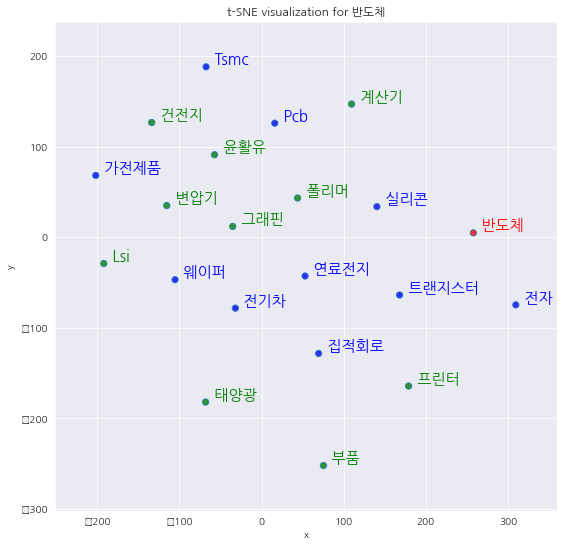

In [32]:
tsnescatterplot(model, '반도체',[t[0] for t in model.wv.most_similar(positive=["반도체"], topn=20)][10:])